In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2
active = relu

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = norm
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
ns = np.arange(10, 500, 10)

# Dense features

## No ensemble

In [6]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[0.011309187661454476, 0.011182063172101266, 0.012600659959085558, 0.014324300749579804, 0.017997949334150446, 0.025023072403291415, 0.05032237764060937, 0.06386122997310537, 0.04527906477914576, 0.03689551966438022, 0.0332615468500983, 0.03144750457829842, 0.031587732271526836, 0.03054609322073575, 0.02956329008658607, 0.03009671207061358, 0.029026254031432386, 0.02887728230844177, 0.027534482980293262, 0.027689036788804605, 0.027309283742178208, 0.02715957909940212, 0.026713899912927424, 0.02773635355337615, 0.027405152743402238, 0.026706601250554646, 0.027132898461404386, 0.02623422953029459, 0.02661057448755525, 0.026444813946342516, 0.026153207614283545, 0.026250752719942493, 0.025923511299784464, 0.02619008444711658, 0.025856607311405256, 0.026350748495663545, 0.026012017703827484, 0.026450716018752936, 0.026157152102306746, 0.025624870095124243, 0.025592159288634973, 0.02644637056428094, 0.025447827209914176, 0.02568242656334393, 0.025903737371618985, 0.025707124015569675, 0.025

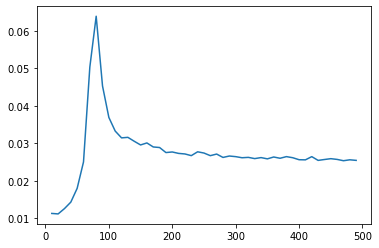

In [7]:
print([np.mean(res) for res in results_l2_dense])
plt.plot(ns, [np.mean(res) for res in results_l2_dense])

In [8]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[0.011440785689083934, 0.011664783621354962, 0.012280970945473195, 0.014662089158796864, 0.017942220768177516, 0.025389943114517623, 0.050044260809521214, 0.0891681446739543, 0.059383642513464306, 0.05436934923121804, 0.048741307556171884, 0.04747290842457389, 0.04491226564713384, 0.04422692964928484, 0.04275625126726636, 0.042047648751223306, 0.04203410229280783, 0.039269063300030396, 0.04114457862886354, 0.03944900128110536, 0.03978728729126531, 0.040783489418181065, 0.03988695582774682, 0.040415881599376056, 0.038144014420221736, 0.0358769960790403, 0.03896633780680991, 0.039391816031443226, 0.03830540459595912, 0.03839499085463681, 0.0389231055282613, 0.036188730295394836, 0.03725405057219054, 0.03891971512828401, 0.038467855952496126, 0.038674667992223875, 0.037131572509171706, 0.03708007344515121, 0.03710072323864076, 0.0368620476797334, 0.037184561974415185, 0.036870542585706836, 0.036073501317732966, 0.03648986825473234, 0.03659719801466799, 0.035375517894814947, 0.036283930652

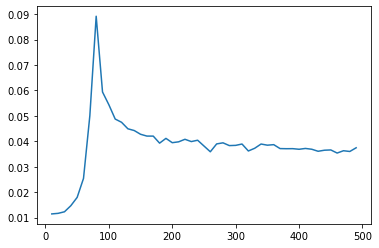

In [9]:
print([np.mean(res) for res in results_wl2_dense])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense])

## Ensemble

In [10]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.012102568327584218, 0.01199130585826337, 0.01179366536274284, 0.011691913343727899, 0.011809383768613593, 0.011747923063645475, 0.011734653417081941, 0.011728800297691903, 0.011689795927049473, 0.011707570314666946, 0.011738125115699261, 0.01174037185203657, 0.011719743414040596, 0.011679353508291565, 0.011675673096816297, 0.011703633632514553, 0.011709085066172875, 0.01171206871338704, 0.011723716519944262, 0.011696691890123559, 0.011694061933707879, 0.011704166860552524, 0.011704823122605424, 0.011691301834942042, 0.011698276933785563, 0.011697175964129645, 0.0116883993405241, 0.011684725616390447, 0.011714748491095472, 0.011695801563915979, 0.011663318704417548, 0.011667829995703085, 0.011677964987640566, 0.011685218939941084, 0.011701918566879068, 0.011699191266573088, 0.011696932484077516, 0.01168649340222453, 0.01172477484031844, 0.011663342897862873, 0.01165227080730276, 0.011675420321819872, 0.0117060443124101, 0.011658371343679355, 0.011692849050023477, 0.011693349020698695

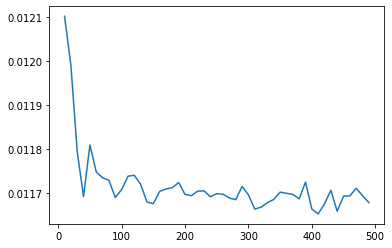

In [11]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [12]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.012068569794573875, 0.011929122979226816, 0.011909566048004288, 0.011745641658347718, 0.011742003449769497, 0.011766160098358019, 0.011775620798198497, 0.011719316580294209, 0.01177831311055842, 0.011712889042667632, 0.011709147801237118, 0.011719271900766885, 0.011729887680394232, 0.011682710632334963, 0.011741499321847582, 0.011718076141445315, 0.011685106821172953, 0.011663122615699914, 0.011695576067324616, 0.011693563086642713, 0.011674174875295264, 0.011695651020437032, 0.01167056306358563, 0.011665381016944757, 0.011711032978737095, 0.01167721418200658, 0.011679972174993931, 0.01169418120629066, 0.011684017525823393, 0.011675861683431928, 0.011677363091618941, 0.011694660529934647, 0.011687810141000836, 0.01171196524370124, 0.011672585380744093, 0.011673395766106551, 0.011660774263355576, 0.0116748027683369, 0.011678835669551465, 0.011702876348462649, 0.011676995757181941, 0.011697752173283709, 0.011688761817154808, 0.011678563570552247, 0.011676079488470477, 0.01167949819482

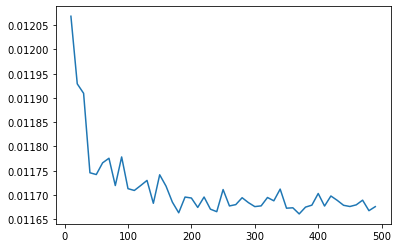

In [13]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [14]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[0.011051751644888735, 0.011517096287780759, 0.012964883791799863, 0.01590174336329924, 0.020823051269251498, 0.1311852861608032, 0.502834986645838, 0.12279931939140107, 0.07253647767578311, 0.054542913649658444, 0.05112173663042265, 0.046343488156551316, 0.042829125381012925, 0.04301345216459243, 0.039740005693247614, 0.0410431963665938, 0.03926258749625737, 0.03760795317869052, 0.03803138080971724, 0.03732407297265066, 0.03715048183819342, 0.03564170886838134, 0.03570386463066213, 0.03670756305527181, 0.035048685594237024, 0.034812849490944556, 0.03452848980969022, 0.035969030343344054, 0.03402406218039715, 0.035453179539973526, 0.03546310331615742, 0.03438172453063164, 0.034212995696077705, 0.03315336130816325, 0.03391082983704089, 0.03439848648133519, 0.03283649791976341, 0.033507202947483515, 0.0339435922816417, 0.03371309568560938, 0.033285631829879245, 0.033357747978095854, 0.03352974521697324, 0.0331616190452409, 0.032953529884925094, 0.03279769833080487, 0.03253719490602698, 0

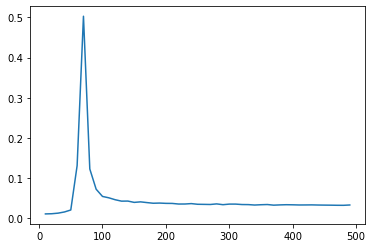

In [15]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [16]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[0.011076602054728168, 0.011358592371155368, 0.012813803626984624, 0.01482508294606295, 0.026214936168215807, 0.031160530110518427, 0.04095323421437104, 0.10126950276187971, 0.14829816562800263, 0.02255890397625009, 0.014384125022607048, 0.04519039470339059, 0.050004244372749716, 0.05835836313550628, 0.0452827471179625, 0.057977536630739956, 0.048621596397093146, 0.026704591418744976, 0.06051542574927158, 0.06235520785092592, 0.03775735094932356, 0.06466837182723133, 0.05084717259341979, 0.028178536816582396, 0.03923823075844751, 0.04922670224238104, 0.0478780632901702, 0.04233450625591019, 0.04751965165625429, 0.0461886853363908, 0.060766430595344055, 0.05534823985840128, 0.0440674378483691, 0.05770248555387013, 0.046437125782123195, 0.041955497155385005, 0.04039438099387416, 0.03215580937905895, 0.046467882641596105, 0.03945617746475058, 0.05195497105984189, 0.05605460030063288, 0.03900314832220695, 0.042974946921955116, 0.039238129028972904, 0.052532936048563864, 0.04932874913435864

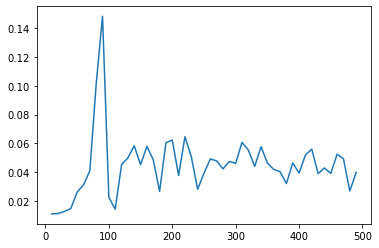

In [17]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [18]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.01254278563098144, 0.01235817046231707, 0.012297639856390128, 0.01225383654762122, 0.012330840077376885, 0.01227330455170116, 0.012274630011268176, 0.012216193101397092, 0.012233894849348238, 0.012238259333931823, 0.01222395885798731, 0.012243273761057324, 0.012212664157231264, 0.012243372907590361, 0.012216902461274819, 0.01222320428914678, 0.012251819111771946, 0.012224870915986081, 0.012224255978050855, 0.012229371885359072, 0.012197973967240674, 0.012257020722814062, 0.01222254230699885, 0.0121984903122786, 0.012180315250348614, 0.012188204634575584, 0.012222563971119453, 0.012214352034151416, 0.012216579973931224, 0.012238600330954133, 0.012186330845596333, 0.012198591815324494, 0.012217305255399808, 0.012236751323958272, 0.012194425275174798, 0.012213955814994754, 0.012214111171519285, 0.012191117680439454, 0.012198522294804365, 0.012212569912219062, 0.012183515685412757, 0.012204353802983958, 0.012209101850149904, 0.01219316692932355, 0.012203744143346799, 0.01218824991309428

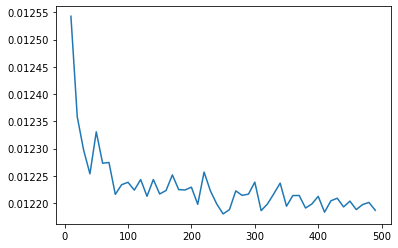

In [19]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [20]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.012610156926910341, 0.012368723334873414, 0.01229821106641998, 0.012241246443280552, 0.012259140440560529, 0.012253051292432749, 0.01223432556661741, 0.012284576677109723, 0.01219212293215608, 0.012212819208248283, 0.012208256461976204, 0.01220399664185826, 0.012209224923106433, 0.012196257537359987, 0.012212840780044119, 0.012199634242532297, 0.012218820502442627, 0.012241311280428513, 0.012185755411996135, 0.012181270850659268, 0.012193491656200187, 0.012239111374371111, 0.012221912223847763, 0.012200196579449754, 0.012208297493765582, 0.01219314736364435, 0.012218526004593583, 0.012199933704034067, 0.012209482802827808, 0.01220706010603375, 0.01220959738289854, 0.012232715611283952, 0.012201498022942223, 0.01222546162737348, 0.01219909241881885, 0.01220439834129822, 0.012200894837213141, 0.012217443886252326, 0.012203569113886054, 0.012213479948623828, 0.0121834253876464, 0.01220774792663037, 0.012201042210013117, 0.012185944910859385, 0.012197965037150798, 0.012215262874508458, 

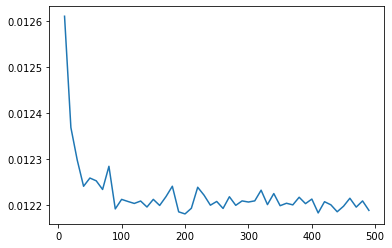

In [21]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])